In [1]:
%cd /mnt/i/Yuki/workspace/exercises/Gasyori100knock

/mnt/i/Yuki/workspace/exercises/Gasyori100knock


https://github.com/yoyoyo-yo/Gasyori100knock/tree/master/Question_11_20

# 準備

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img_path = 'Question_11_20/imori.jpg'
img = cv2.imread(img_path)

noise_img_path = 'Question_11_20/imori_noise.jpg'
noise_img = cv2.imread(noise_img_path)

dark_img_path = 'Question_11_20/imori_dark.jpg'
dark_img = cv2.imread(dark_img_path)

## OpenCV は BGR を採用しているので RGB に変換する
BGR を採用している理由は単なる歴史的経緯らしい

In [4]:
img = img[:, :, ::-1]
noise_img = noise_img[:, :, ::-1]
dark_img = dark_img[:, :, ::-1]

# 問題

## Q.11. 平滑化フィルタ

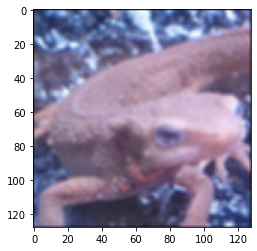

In [5]:
orig = img.copy()
ans = np.zeros_like(orig, dtype=np.uint8)

padded = np.zeros((orig.shape[0] + 2, orig.shape[1] + 2, orig.shape[2]), dtype=np.uint8)
padded[1:-1, 1:-1] = orig

for i in range(ans.shape[0]):
    for j in range(ans.shape[1]):
        ans[i, j] = np.mean(padded[i:i+3, j:j+3], axis=(0, 1))
ans = np.clip(ans, 0, 255)
ans = ans.astype(np.uint8)

plt.imshow(ans)

## Q.12. モーションフィルタ

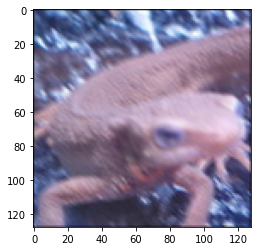

In [6]:
orig = img.copy()
ans = np.zeros_like(orig, dtype=np.uint8)

padded = np.zeros((orig.shape[0] + 2, orig.shape[1] + 2, orig.shape[2]), dtype=np.uint8)
padded[1:-1, 1:-1] = orig

motion_filter = np.expand_dims(np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
]), axis=2) / 3
for i in range(ans.shape[0]):
    for j in range(ans.shape[1]):
        ans[i, j] = np.sum(padded[i:i+3, j:j+3] * motion_filter, axis=(0, 1))
ans = np.clip(ans, 0, 255)
ans = ans.astype(np.uint8)

plt.imshow(ans)

## Q.13. MAX-MINフィルタ

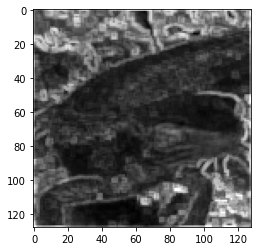

In [7]:
orig = img.copy()
ans = np.zeros(orig.shape[:2], dtype=np.uint8)

padded = np.zeros((orig.shape[0] + 2, orig.shape[1] + 2, orig.shape[2]), dtype=np.uint8)
padded[1:-1, 1:-1] = orig

for i in range(ans.shape[0]):
    for j in range(ans.shape[1]):
        ans[i, j] = np.max(padded[i:i+3, j:j+3]) - np.min(padded[i:i+3, j:j+3])
ans = np.clip(ans, 0, 255)
ans = ans.astype(np.uint8)

plt.imshow(ans, cmap='gray')

## Q.14. 微分フィルタ

In [8]:
orig = img.copy()
lum = orig[:, :, 0] * 0.2126 + orig[:, :, 1] * 0.7152 + orig[:, :, 2] * 0.0722

padded = np.zeros((lum.shape[0] + 2, lum.shape[1] + 2), dtype=np.uint8)
padded[1:-1, 1:-1] = lum

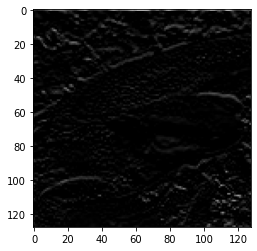

In [9]:
ans = np.zeros_like(lum)

ver_diff_filter = np.array([
    [0, -1, 0],
    [0, 1, 0],
    [0, 0, 0],
])
for i in range(ans.shape[0]):
    for j in range(ans.shape[1]):
        ans[i, j] = np.sum(padded[i:i+3, j:j+3] * ver_diff_filter)
ans = np.clip(ans, 0, 255)
ans = ans.astype(np.uint8)

plt.imshow(ans, cmap='gray')

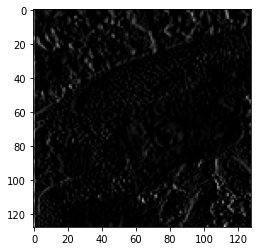

In [10]:
ans = np.zeros_like(lum)

hor_diff_filter = np.array([
    [0, 0, 0],
    [-1, 1, 0],
    [0, 0, 0],
])
for i in range(ans.shape[0]):
    for j in range(ans.shape[1]):
        ans[i, j] = np.sum(padded[i:i+3, j:j+3] * hor_diff_filter)
ans = np.clip(ans, 0, 255)
ans = ans.astype(np.uint8)

plt.imshow(ans, cmap='gray')

## Q.15. Prewittフィルタ

In [11]:
orig = img.copy()
lum = orig[:, :, 0] * 0.2126 + orig[:, :, 1] * 0.7152 + orig[:, :, 2] * 0.0722

padded = np.zeros((lum.shape[0] + 2, lum.shape[1] + 2), dtype=np.uint8)
padded[1:-1, 1:-1] = lum

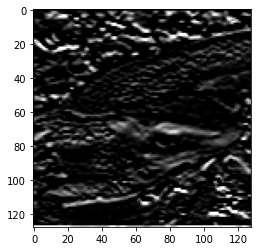

In [12]:
ans = np.zeros_like(lum)

ver_prewitt_filter = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1],
])
for i in range(ans.shape[0]):
    for j in range(ans.shape[1]):
        ans[i, j] = np.sum(padded[i:i+3, j:j+3] * ver_prewitt_filter)
ans = np.clip(ans, 0, 255)
ans = ans.astype(np.uint8)

plt.imshow(ans, cmap='gray')

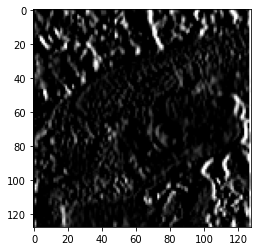

In [13]:
ans = np.zeros_like(lum)

hor_prewitt_filter = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1],
])
for i in range(ans.shape[0]):
    for j in range(ans.shape[1]):
        ans[i, j] = np.sum(padded[i:i+3, j:j+3] * hor_prewitt_filter)
ans = np.clip(ans, 0, 255)
ans = ans.astype(np.uint8)

plt.imshow(ans, cmap='gray')

## Q.16. Sobelフィルタ

In [14]:
orig = img.copy()
lum = orig[:, :, 0] * 0.2126 + orig[:, :, 1] * 0.7152 + orig[:, :, 2] * 0.0722

padded = np.zeros((lum.shape[0] + 2, lum.shape[1] + 2), dtype=np.uint8)
padded[1:-1, 1:-1] = lum

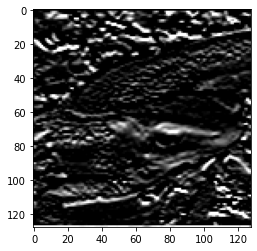

In [15]:
ans = np.zeros_like(lum)

ver_sobel_filter = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1],
])
for i in range(ans.shape[0]):
    for j in range(ans.shape[1]):
        ans[i, j] = np.sum(padded[i:i+3, j:j+3] * ver_sobel_filter)
ans = np.clip(ans, 0, 255)
ans = ans.astype(np.uint8)

plt.imshow(ans, cmap='gray')

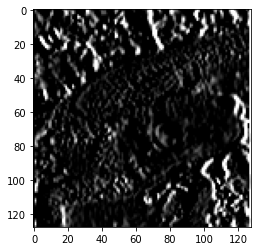

In [16]:
ans = np.zeros_like(lum)

hor_sobel_filter = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1],
])
for i in range(ans.shape[0]):
    for j in range(ans.shape[1]):
        ans[i, j] = np.sum(padded[i:i+3, j:j+3] * hor_sobel_filter)
ans = np.clip(ans, 0, 255)
ans = ans.astype(np.uint8)

plt.imshow(ans, cmap='gray')

## Q.17. Laplacianフィルタ

In [17]:
orig = img.copy()
lum = orig[:, :, 0] * 0.2126 + orig[:, :, 1] * 0.7152 + orig[:, :, 2] * 0.0722

padded = np.zeros((lum.shape[0] + 2, lum.shape[1] + 2), dtype=np.uint8)
padded[1:-1, 1:-1] = lum

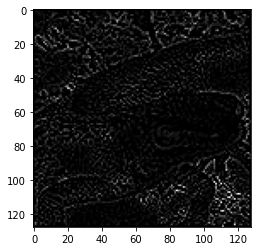

In [18]:
ans = np.zeros_like(lum)

laplacian_filter = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0],
])
for i in range(ans.shape[0]):
    for j in range(ans.shape[1]):
        ans[i, j] = np.sum(padded[i:i+3, j:j+3] * laplacian_filter)
ans = np.clip(ans, 0, 255)
ans = ans.astype(np.uint8)

plt.imshow(ans, cmap='gray')

## Q.18. Embossフィルタ

In [19]:
orig = img.copy()
lum = orig[:, :, 0] * 0.2126 + orig[:, :, 1] * 0.7152 + orig[:, :, 2] * 0.0722

padded = np.zeros((lum.shape[0] + 2, lum.shape[1] + 2), dtype=np.uint8)
padded[1:-1, 1:-1] = lum

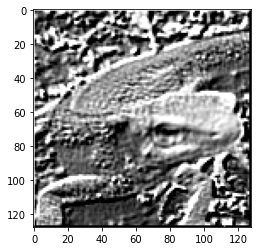

In [20]:
ans = np.zeros_like(lum)

emboss_filter = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2],
])
for i in range(ans.shape[0]):
    for j in range(ans.shape[1]):
        ans[i, j] = np.sum(padded[i:i+3, j:j+3] * emboss_filter)
ans = np.clip(ans, 0, 255)
ans = ans.astype(np.uint8)

plt.imshow(ans, cmap='gray')

## Q.19. LoGフィルタ

In [21]:
orig = noise_img.copy()
lum = orig[:, :, 0] * 0.2126 + orig[:, :, 1] * 0.7152 + orig[:, :, 2] * 0.0722

padded = np.zeros((lum.shape[0] + 4, lum.shape[1] + 4), dtype=np.uint8)
padded[2:-2, 2:-2] = lum

In [22]:
log_filter = np.zeros((5, 5))

sigma = 3
for x in range(-2, 3):
    for y in range(-2, 3):
        log_filter[y + 2, x + 2] = \
            (x ** 2 + y ** 2 - 2 * (sigma ** 2)) / 2 / np.pi / (sigma ** 6) * \
            np.exp(-(x ** 2 + y ** 2) / 2 / (sigma ** 2))
log_filter = log_filter / log_filter.sum()

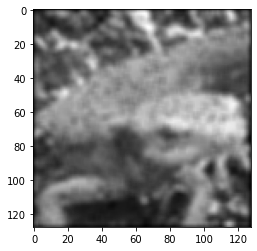

In [23]:
ans = np.zeros_like(lum)

for i in range(ans.shape[0]):
    for j in range(ans.shape[1]):
        ans[i, j] = np.sum(padded[i:i+5, j:j+5] * log_filter)
ans = np.clip(ans, 0, 255)
ans = ans.astype(np.uint8)

plt.imshow(ans, cmap='gray')

In [24]:
log_filter = np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 2, 1, 0],
    [1, 2, -16, 2, 1],
    [0, 1, 2, 1, 0],
    [0, 0, 1, 0, 0],
])

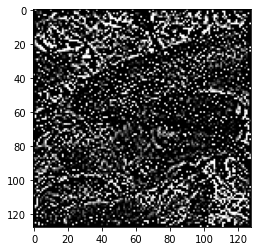

In [25]:
ans = np.zeros_like(lum)

for i in range(ans.shape[0]):
    for j in range(ans.shape[1]):
        ans[i, j] = np.sum(padded[i:i+5, j:j+5] * log_filter)
ans = np.clip(ans, 0, 255)
ans = ans.astype(np.uint8)

plt.imshow(ans, cmap='gray')

## Q.20. ヒストグラム表示

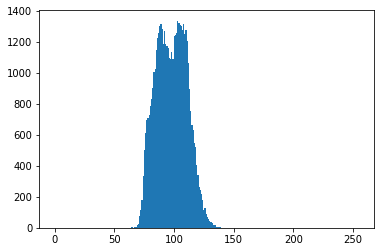

In [26]:
counts = plt.hist(dark_img.flatten(), bins=256, range=(0, 255))